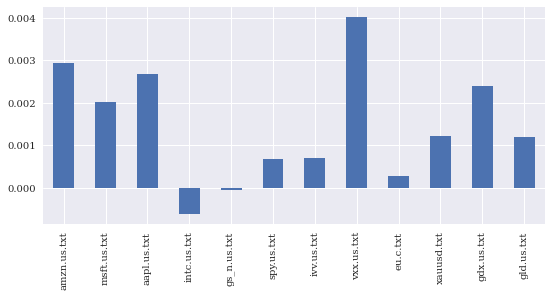

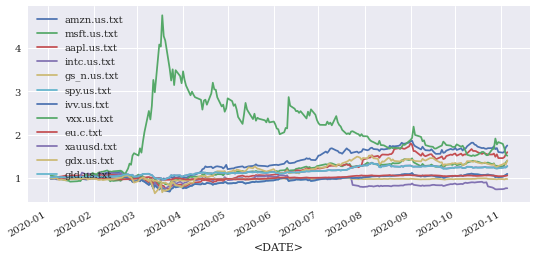

In [3]:
# Python 3
# Python for Finance, 2nd ed., Hilpisch, Ives
# Chapter 8 - Financial Time Series
# Figure 8-2 Mean values of percentage changes as bar plot
# Figure 8-3 Cumulative log returns over time
# Figure 8-4 Resampled cumulative log returns over time (monthly)
# https://stooq.com/db/h/
# https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python

%matplotlib inline
import numpy as np
import pandas as pd
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family']='serif'

path0 = './data/daily/us/nasdaq stocks/1/amzn.us.txt'
path1 = './data/daily/us/nasdaq stocks/2/msft.us.txt'
path2 = './data/daily/us/nasdaq stocks/1/aapl.us.txt'
path3 = './data/daily/us/nasdaq stocks/1/intc.us.txt'
path4 = './data/daily/us/nyse stocks/1/gs_n.us.txt'
path5 = './data/daily/us/nyse etfs/spy.us.txt'
path6 = './data/daily/us/nyse etfs/ivv.us.txt' #etf simulates SPX index
path7 = './data/daily/us/nyse etfs/vxx.us.txt' #etf simulates VIX index
path8 = './data/daily/world/commodities cash/eu.c.txt'
path9 = './data/daily/world/currencies/major/xauusd.txt' #stand-in for XAU index
path10 = './data/daily/us/nyse etfs/gdx.us.txt'
path11 = './data/daily/us/nyse etfs/gld.us.txt'

filename = [path0, path1, path2, path3, path4, path5, path6, \
            path7, path8, path9, path10, path11]

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    data = pd.read_csv(filename[i], index_col=2, parse_dates=True)
    closePrice = data['<CLOSE>']
    closePriceYear = closePrice.loc['2020']
    
    symbol_long = filename[i].split('/')
    symbol = symbol_long[-1]
    
    closePriceYear.rename(symbol, inplace=True)
    
    if i==0:
        closePriceSymbolList = pd.DataFrame(data=closePriceYear)
    closePriceSymbolList.loc[:,symbol] = closePriceYear


# https://stackoverflow.com/questions/43283202/permission-denied-when-pandas-dataframe-to-tempfile-csv

# Percentage Returns
closePriceSymbolList.pct_change().mean().plot(kind='bar', figsize=(9,4))

# Log Returns
rets = np.log(closePriceSymbolList/closePriceSymbolList.shift(1))
rets.cumsum().apply(np.exp).plot(figsize=(9,4))

In [4]:
#Resampling from daily to weekly

closePriceSymbolList.resample('1w', label='right').last().head()

,amzn.us.txt,msft.us.txt,aapl.us.txt,intc.us.txt,gs_n.us.txt,spy.us.txt,ivv.us.txt,vxx.us.txt,eu.c.txt,xauusd.txt,gdx.us.txt,gld.us.txt
<DATE>,,,,,,,,,,,,
2020-01-05,1874.97,157.37,73.850,59.068,26.8800,317.84,319.02,15.29,1.11575,1549.02,29.17,145.86
2020-01-12,1883.16,160.06,77.050,57.929,26.8701,321.09,322.29,14.12,1.11182,1560.30,28.45,146.91
2020-01-19,1864.72,165.78,79.138,58.577,27.1100,327.24,328.55,13.32,1.10896,1557.07,28.42,146.58
2020-01-26,1861.64,163.73,79.032,67.294,26.9600,324.10,325.34,14.24,1.10228,1571.66,29.22,147.98
2020-02-02,2008.72,168.89,76.850,62.833,26.5600,317.16,318.45,16.20,1.10936,1586.88,28.99,149.33


In [6]:
#Resampling from weekly to monthly
closePriceSymbolList.resample('1m', label='right').last().head()

,amzn.us.txt,msft.us.txt,aapl.us.txt,intc.us.txt,gs_n.us.txt,spy.us.txt,ivv.us.txt,vxx.us.txt,eu.c.txt,xauusd.txt,gdx.us.txt,gld.us.txt
<DATE>,,,,,,,,,,,,
2020-01-31,2008.72,168.89,76.850,62.833,26.56,317.16,318.45,16.20,1.10936,1586.880,28.99,149.33
2020-02-29,1883.75,161.17,68.032,54.836,25.81,292.06,291.53,22.81,1.10248,1577.400,26.22,148.38
2020-03-31,1949.72,156.89,63.285,53.453,25.42,255.60,256.16,46.25,1.10315,1575.150,23.04,148.05
2020-04-30,2474.00,178.28,73.120,59.241,26.36,288.05,288.65,37.87,1.09512,1686.855,32.26,158.80
2020-05-31,2442.37,182.81,79.342,62.505,26.15,301.77,302.54,33.13,1.11046,1731.500,34.32,162.91


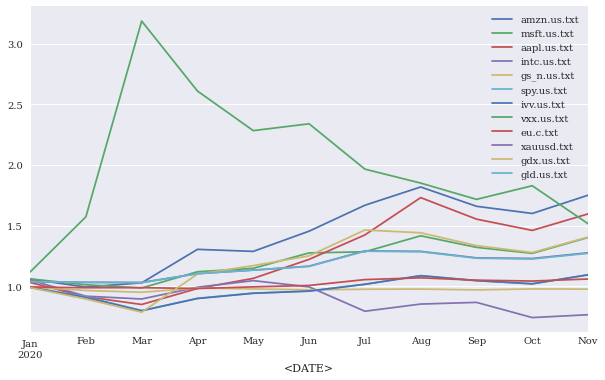

In [8]:
#Resampled cumulative log returns over time (monthly)
rets.cumsum().apply(np.exp).resample('1m', label='right').last().plot(figsize=(10,6))